# Advanced Data Analysis- 101

* This is the 1st Notebook
* Author: **Rahul Sawhney**

Welcome to the advanced Data Analysis 101.

*Note From the Author* -
* *Every Data is different, Thus different data problems requires different data techniques. Don't set these functions/Class as the benchmark for all the Data Analysis tasks.* 
* *Learning Data Analysis, without having a Strong grip in Statistics is like inventing an optimization algorithm from the scratch without knowing how to code.*
* *Improving the codes given in this notebook would be highly appreciable*

# Control Flow - 
* Data Characteristics
* Missing values plot
* Some Statistical Tests
* Target Transformation
* Correration-Coefficient class
* Date-time Plots
* Categorical Feature Analysis
* Numeric Feature Analysis
* anomaly detection* 

## Data Analysis -
Data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses operate more effectively

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Why Data Characteristics ?
 * For Analysis of Data, It is very important to undertand the characteristics of the data. 
 * In Industry, It DOES NOT MATTERS what tools you use for analysing data but what really matters is what INSIGHTS you can drawn for that data.
 

In [10]:
# importing the dataset
train = pd.read_csv("train.csv", sep =",", squeeze = True)
test = pd.read_csv("test.csv",  sep =",", squeeze = True)
a_train = train.copy()

# concatenating train and test
dataset = pd.concat((train, test))

# Setting the target Variable
SalePrice = train["SalePrice"]
dataset.drop(columns = ["SalePrice"], axis = 1, inplace = True)


# ---------------- FUNCTION 1: DATA CHARACTERISTICS  ------------------------#
# Data Characteristics
def data_characteristics(dataset):
    # shape of the dataset
    print("Shape of the Dataset : {}".format(dataset.shape))
    print("Number of Columns in the Dataset : {}".format(dataset.shape[1]))
    print("Number of Rows in the Dataset : {}".format(dataset.shape[0]))
    print("-"*40)
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = dataset.select_dtypes(include = [np.number])
    categoric_features = dataset.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("-"*40)
    
    # Unique values
    print("No of unique values : {}".format(dataset.nunique()))
    print("-"*40)
    
    # Number of NOT NUll Values
    print("No of NON-NANS : {}".format(dataset.count()))
    print("-"*40)
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(dataset.info(verbose = False, memory_usage = "deep")))
    print("-"*40)
    
#------------------------------------------------------------------------------#

# dataset Characteristics
print(data_characteristics(dataset))

# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dataset.describe(include = "all", percentiles = [.15, .25, .50, .75, .85]).transpose()

Shape of the Dataset : (2919, 80)
Number of Columns in the Dataset : 80
Number of Rows in the Dataset : 2919
----------------------------------------
Number of Numerical Features : 37
Number of Categorical Features : 43
----------------------------------------
No of unique values : Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
MiscVal            38
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 80, dtype: int64
----------------------------------------
No of NON-NANS : Id               2919
MSSubClass       2919
MSZoning         2915
LotFrontage      2433
LotArea          2919
                 ... 
MiscVal          2919
MoSold           2919
YrSold           2919
SaleType         2918
SaleCondition    2919
Length: 80, dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 8

,count,unique,top,freq,mean,std,min,15%,25%,50%,75%,85%,max
Id,2919,NaN,NaN,NaN,1460,842.787,1,438.7,730.5,1460,2189.5,2481.3,2919
MSSubClass,2919,NaN,NaN,NaN,57.1377,42.5176,20,20,20,50,70,90,190
MSZoning,2915,5,RL,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,2433,NaN,NaN,NaN,69.3058,23.3449,21,50,59,68,80,88,313
LotArea,2919,NaN,NaN,NaN,10168.1,7887,1300,6120,7478,9453,11570,13072,215245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,2919,NaN,NaN,NaN,50.826,567.402,0,0,0,0,0,0,17000
MoSold,2919,NaN,NaN,NaN,6.21309,2.71476,1,3,4,6,8,9,12
YrSold,2919,NaN,NaN,NaN,2007.79,1.31496,2006,2006,2007,2008,2009,2009,2010
SaleType,2918,9,WD,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Looking at the datset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Why Missing Values Plot ?
The concept of missing values is important to understand in order to successfully manage data.  If the missing values are not handled properly by the researcher, then he/she may end up drawing an inaccurate inference about the data.  Due to improper handling, the result obtained by the researcher will differ from ones where the missing values are present.

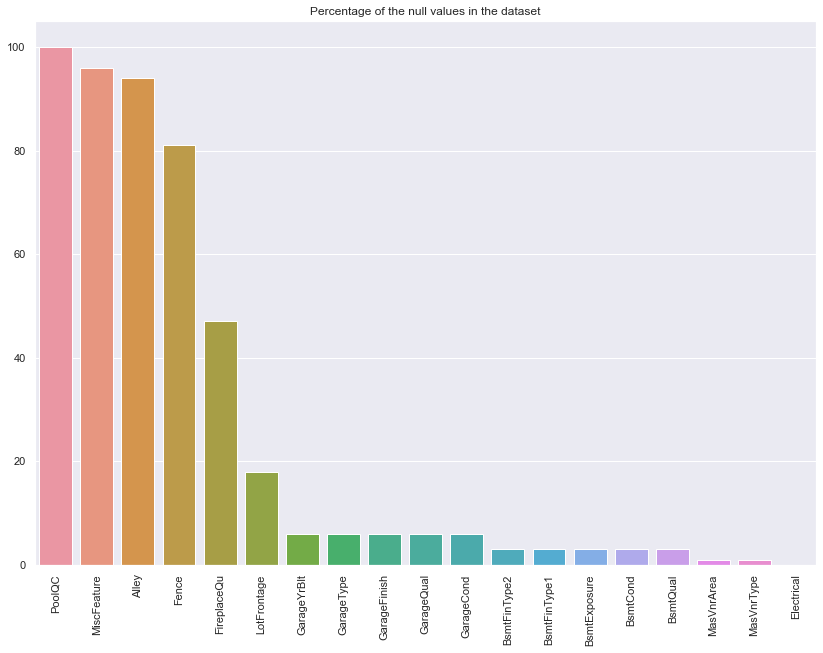

In [12]:
# ---------------- FUNCTION 1: MISSING VALUES PLOT ------------------------#
# Percentage of Null Vlues
def check_null(dataset):
    null_per = (dataset.isnull().sum() / len(dataset)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.xticks(rotation = "90")
        plt.title("Percentage of the null values in the dataset")
        plt.show()
                
    except:
        print("There is NO null values in the dataset")
        print("Returning the dataset....")
        return dataset
    
    return null_plot

#----------------------------------------------------------------------------#
                
check_null(a_train)  

In [19]:
# droping High-Null columns

dataset.drop(columns = ["Id","PoolQC", "MiscFeature","Alley",
                        "Fence", "FireplaceQu"], axis = 1, inplace = True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


## Importance of Statistical Tests

### *Anova* -
Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample. ANOVA was developed by the statistician Ronald Fisher. The ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>


### *Mutual Information* - 
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y)
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Mutual information is a measure of dependence or “mutual dependence” between two random variables. As such, the measure is symmetrical, meaning that I(X ; Y) = I(Y ; X).

,feature,f,p
8,Neighborhood,71.784865,1.558600e-225
18,ExterQual,443.334831,1.439551e-204
21,BsmtQual,316.148635,8.158548e-196
30,KitchenQual,407.806352,3.032213e-192
34,GarageFinish,213.867028,6.228747e-115
32,FireplaceQu,121.075121,2.971217e-107
20,Foundation,100.253851,5.791895e-91
33,GarageType,80.379992,6.117026e-87
24,BsmtFinType1,64.688200,2.386358e-71
27,HeatingQC,88.394462,2.667062e-67


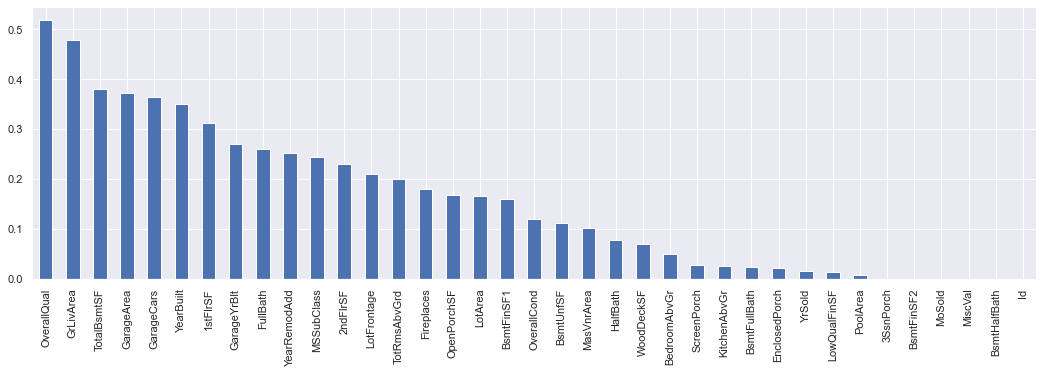

In [17]:
# Applying Some Statistical Test
class Statistical_tests:
    def __init__(self, train):
        self.train = train
        
    # ---------------------------- FUNCTION 1: ANOVA ---------------------------------#
    def Anova(self):
        from scipy import stats
        categoric_features = self.train.select_dtypes(exclude = [np.number]).columns
        train[categoric_features] = train[categoric_features].fillna("missing")

        # Making the ANOVA
        anova = {"feature":[], "f":[], "p":[]}
        for cat in train[categoric_features]:
            group_prices = []
    
            for group in train[cat].unique():
                group_prices.append(train[train[cat] == group]["SalePrice"].values)
            
            f, p = stats.f_oneway(*group_prices)
            anova['feature'].append(cat)
            anova['f'].append(f)
            anova['p'].append(p)

        anova = pd.DataFrame(anova)
        anova = anova[["feature","f","p"]]
        anova.sort_values("p", inplace = True)
        

        return anova
        
    
    # ------------------------- FUNCTION 2: MUTUAL-INFORMATION -----------------------------#
    def mutual_information(self):
    
        # Choosing the numeric features
        numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
        numeric_vars = list(self.train.select_dtypes(include = numerics).columns)
        train = self.train[numeric_vars]
        
        
        
        # Splitting the numerical dataset into train and test set
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,:-1],
                                                            train.iloc[:,-1],
                                                            test_size = 0.3,
                                                            random_state = 0)
    
        from sklearn.feature_selection import mutual_info_regression
        from sklearn.feature_selection import SelectPercentile
    
    
        mi = mutual_info_regression(x_train.fillna(0), y_train)
        mi = pd.Series(mi)
        mi.index = x_train.columns
        mi = mi.sort_values(ascending = False)

        # Plotting the Bar-plot of the dataset
        mi.sort_values(ascending = False).plot.bar(figsize = (18,5))
    
        # Selecting the best Numeric-Features
        features = SelectPercentile(mutual_info_regression, 
                                percentile = 10).fit(x_train.fillna(0), y_train)
    
        # Returning the Support of the columns of the x_train
        return x_train.columns[features.get_support()]
   
    #-----------------------------------------------------------------------------------------#
    
# Accessing the Class + method
sts = Statistical_tests(train)
sts.mutual_information()
sts.Anova()

* From the Anova: I can Conclude that the Features having P-Value >= 0.05 is NOT Relevent in predicting the Target when they are used in Model Building. Hence, We will remove those irrelevent features 

* Therefore Street, landSlope and Utilities are NOT important in Predicting the Target SalePrice
* I will Deal with the Feature Selection from Mutual-Information in Feature Selection module

In [23]:
# Dropping the Irrelevent columns
dataset.drop(columns=["Street", "Utilities", "LandSlope"], 
             axis= 1, inplace = True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


### Target Transformation
* The distribution of a variable is a description of the relative numbers of times each possible outcome will occur in a number of trials. The function describing the probability that a given value will occur is called the probability density function (abbreviated PDF), and the function describing the cumulative probability that a given value or any value smaller than it will occur is called the distribution function (or cumulative distribution function, abbreviated CDF).

* If our Target is not Normally distributed, then it will impact the performance of linear Models 


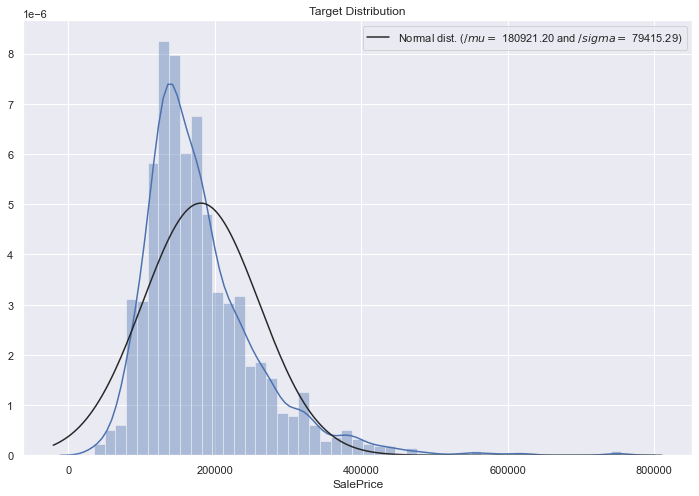

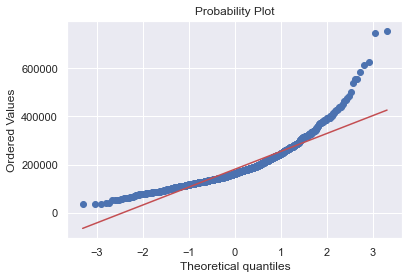

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)), (74160.16474519415, 180921.19589041095, 0.9319665641512986))
--------------------------------------------------


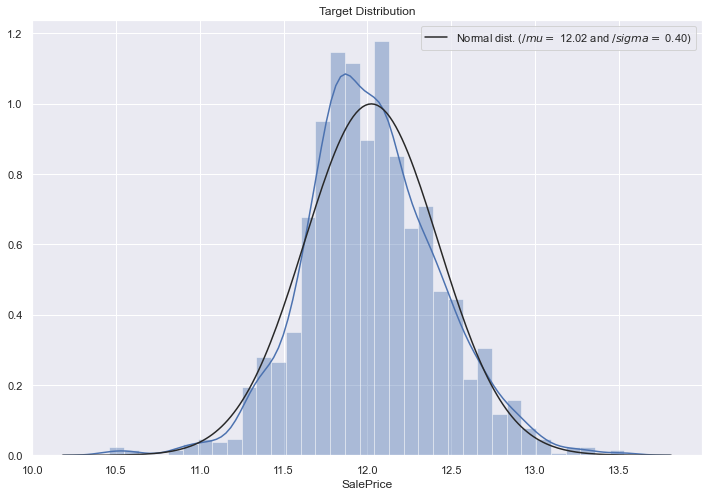

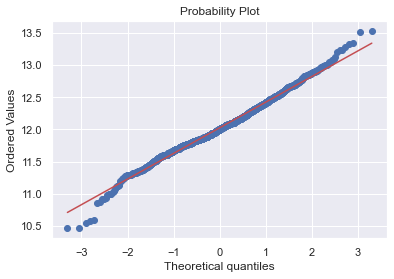

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
       13.5211395 , 13.53447303])), (0.3982622308161888, 12.024050901109383, 0.9953761475636613))
--------------------------------------------------


In [24]:
class Transform_target_distribution:
    def __init__(self, target):
        self.target = target
     
    # -------------------- FUNCTION 1: INITIAL DISTRIBUTION -----------------------------#
    # Initial distribution of the Target
    def check_target_distribution(self):
        from scipy import stats
        plt.figure(figsize = (12,8))
        plot1 = sns.distplot(self.target , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(self.target)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot2 = stats.probplot(self.target, plot = plt)
        plt.show()
    
        # printing the plots
        print(plot1)
        print(plot2)
        print("-"*50)
   
    # -------------------- FUNCTION 2: TRANSFORMED DISTRIBUTION -------------------------#
    # Transforming the distribution of the Target
    def log_distribution(self):
        from scipy import stats
        target2 = np.log(self.target)
        plt.figure(figsize = (12,8))
        plot3 = sns.distplot(target2 , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(target2)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot4 = stats.probplot(target2, plot = plt)
        plt.show()
    
        print(plot3)
        print(plot4)
        print("-"*50)
        
    #---------------------------------------------------------------------------------------
    

# Accessing the Class
object = Transform_target_distribution(train["SalePrice"])
object.check_target_distribution()
object.log_distribution()

# Changing Saleprice to log(SalePrice)
train["SalePrice"] = np.log(train["SalePrice"])

### *Correration Coefficient* -
The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

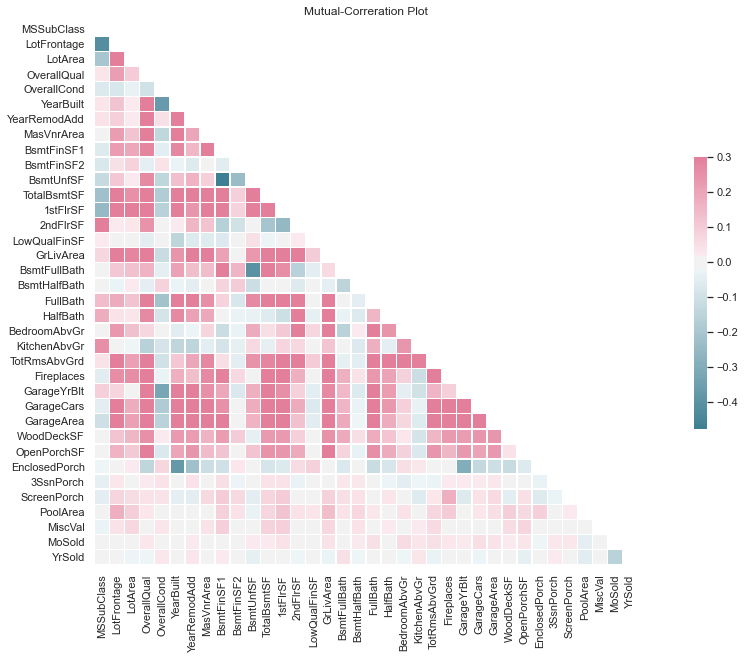

----------------------------------------
Number of Correrated features: 4
List of Correrated Features: ['TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt', 'GarageArea']
----------------------------------------
      feature_1     feature_2  correration
0    GarageArea    GarageCars     0.889700
1    GarageCars    GarageArea     0.889700
2     YearBuilt   GarageYrBlt     0.834812
3   GarageYrBlt     YearBuilt     0.834812
4     GrLivArea  TotRmsAbvGrd     0.808354
5  TotRmsAbvGrd     GrLivArea     0.808354
6   TotalBsmtSF      1stFlrSF     0.801670
7      1stFlrSF   TotalBsmtSF     0.801670


In [25]:
# Correration-Coefficient class
class Correration:
    def __init__(self, dataset):
        self.dataset = dataset
        
    
    # ------------------------ FUNCTION 1: CORRERATION-COEFFICIENT ------------------------#
    # Making a Correration-coefficient plot
    def correration_coefficient(self):
        # taking only numeric columns + corr_matrix
        numeric_features = self.dataset.select_dtypes(include = [np.number])
        corr_matrix = numeric_features.corr()
        
        # Setting style + mask + axes + custom_cmap
        sns.set(style = "white")
        mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
        f, ax = plt.subplots(figsize = (20, 10))
        cmap = sns.diverging_palette(220, 1, as_cmap=True)
        
        # Setting the Heatmap
        sns.heatmap(data = corr_matrix, 
                    mask=mask, 
                    cmap=cmap, 
                    vmax=.3, 
                    center=0,
                    square=True, 
                    linewidths=.5, 
                    cbar_kws={"shrink": .5})
        
        plt.title("Mutual-Correration Plot")
        plt.show()
    
    # ----------------------- FUNCTION 2: CORRERATED-FEATURES ---------------------------#
    # Getting the list of Correrated features
    def select_correration(self):
        # making a set
        corr_set = set()
    
        # making a corr matrix
        corr_matrix = self.dataset.corr()
    
        # select value under some threshold
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > 0.8:
                    matrix = corr_matrix.columns[i]
                
                    # adding the values in set
                    corr_set.add(matrix)
    
        print("-"*40)
        print("Number of Correrated features: {}".format(len(corr_set)))
        print("List of Correrated Features: {}".format(list(corr_set)))
        print("-"*40)
    
    
    # --------------------- FUNCTION 3: FEATURES-CORRERATION ----------------------------#
    def feature_correration(self):
        corr_matrix = self.dataset.corr()
        corr_matrix = corr_matrix.abs().unstack()
        corr_matrix = corr_matrix.sort_values(ascending = False)
    
        #select values of corr_matrix above the threshold set
        corr_matrix = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix < 1)]
    
        corr_matrix = pd.DataFrame(corr_matrix).reset_index()
        corr_matrix.columns = ["feature_1","feature_2", "correration"]
    
        print(corr_matrix)
    
    #------------------------------------------------------------------------------------#
        
# Accessing the Correration Class + methods
corr_class = Correration(dataset)
corr_class.correration_coefficient()
corr_class.select_correration()
corr_class.feature_correration()


* From the above plot, I can conclude that there are total of 4 variables correrated with each other, which adds redundent information in our dataset.
* Multicoliniear causes affect the accuracy of linear models like SVM, Multiple Regression etc..

### Date-Time plot

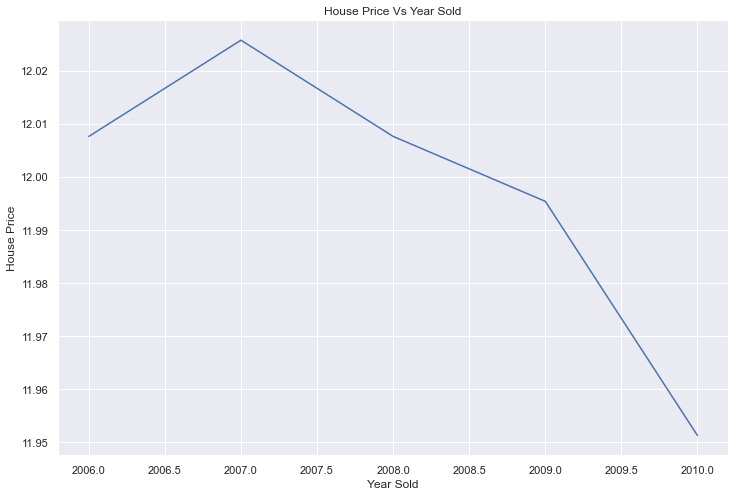

In [27]:
# Understanding the Date-time variable
def date_time_plot(dataset):
    sns.set()
    c_data = dataset.copy()
    
    # grouping YrSold with SalePrice
    dataset.groupby("YrSold")["SalePrice"].median().plot(figsize = (12, 8))
    plt.xlabel("Year Sold")
    plt.ylabel("House Price")
    plt.title("House Price Vs Year Sold")
    plt.show()
    
date_time_plot(train)

* From this plot, I can conclude that the Price of the House decreases with the increase in year

----------------------------------------


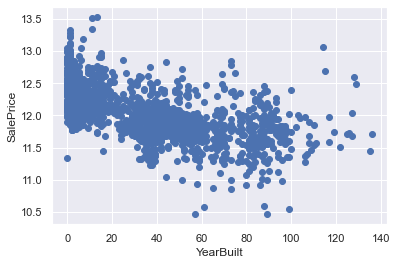

----------------------------------------


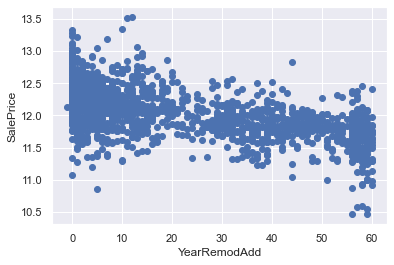

----------------------------------------


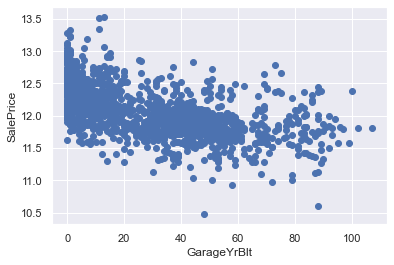

----------------------------------------


In [28]:
def date_time_compare_plots(dataset):
    # Goal: Compare the difference of all features with Target Variable
    
    # Selecting the Date-time features
    year_features = dataset[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]]
    
    # looking through each features
    for feature in year_features:
        print("-"*40)
        if feature!= "YrSold":
            c_data = dataset.copy()
            c_data[feature] = c_data["YrSold"]- c_data[feature]
            
            # Makinf the Scatter plot 
            plt.scatter(c_data[feature], c_data["SalePrice"])
            plt.xlabel(feature)
            plt.ylabel("SalePrice")
            plt.show()
            
            
date_time_compare_plots(train)

### Categorical Features Analysis

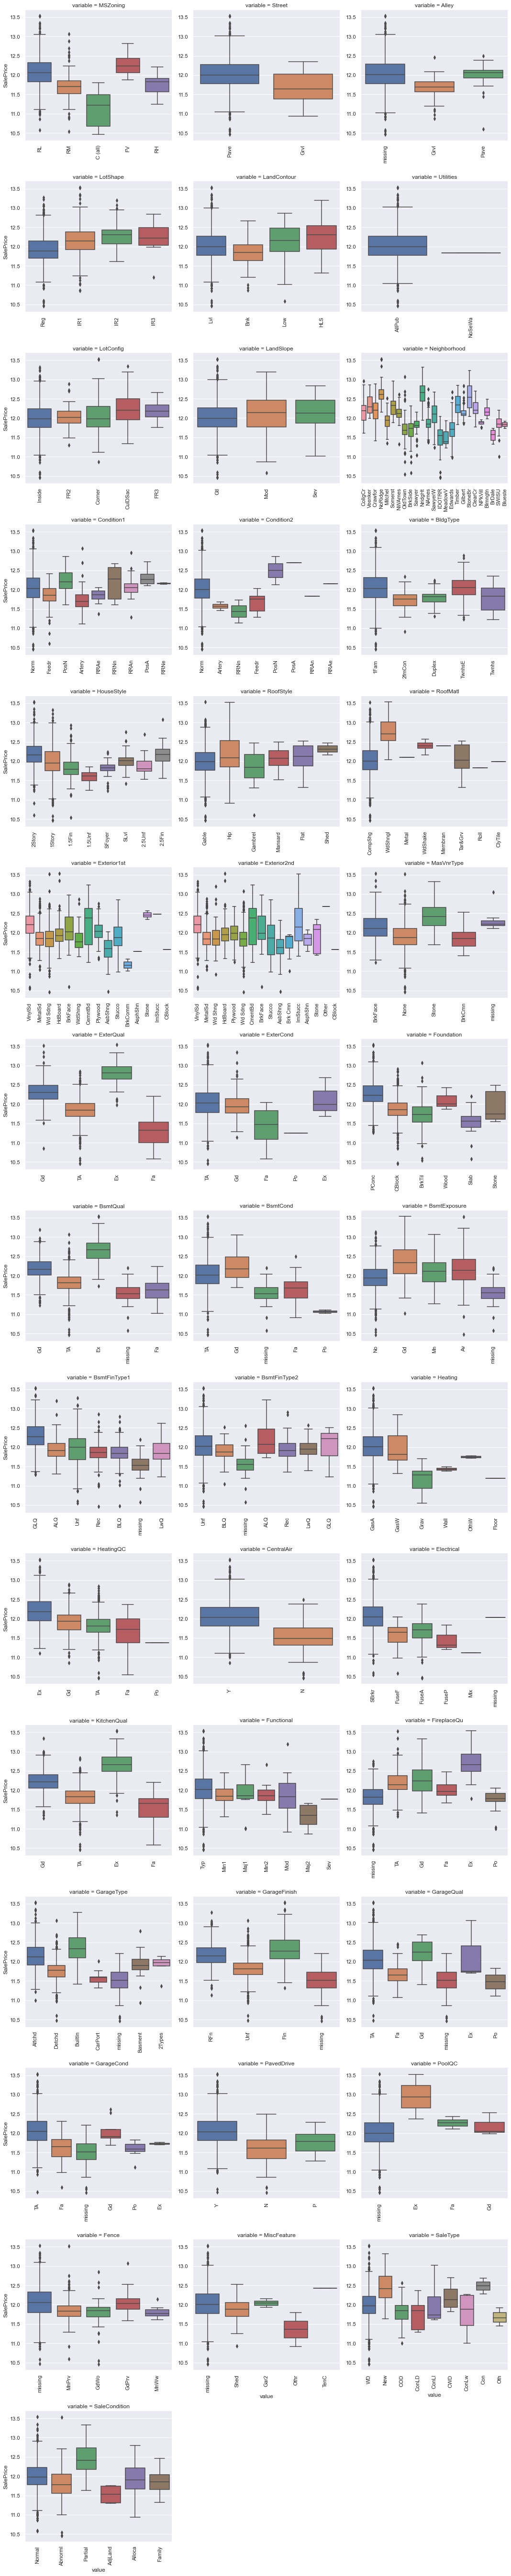

In [53]:
# Categorical Feature Analysis Class
class Categorical_feature_analysis:
    def __init__(self, dataset, train):
        self.dataset = dataset
        self.train = train
        
    # ------------------------------- FUNCTION 1: CARDINALITY ---------------------------------------------#
    # Function to Check Cardinality of the categorical features
    def Cardinality(self):
        for feature in self.dataset.columns:
            # Selecting only the categorical variables
            if self.dataset[feature].dtypes == 'object':
                # Filling the missing values with mode
                self.dataset[feature] = self.dataset[feature].fillna(self.dataset[feature].mode().iloc[0])
                # Selecting the len(unique values) of each categorical
                unique_category = len(self.dataset[feature].unique())
                print("Features in dataset '{column_name}' has '{unique_category}' unique categories".
                      format(column_name = feature, unique_category=unique_category))
    
    
    # --------------------------- FUNCTION 2: CARDINALITY PLOTS {Count plot} -------------------------------#
    def Cardinality_plot(self):
        # Selecting the Categorical features
        categoric_features = self.dataset.select_dtypes(exclude = [np.number])
        # Looping through all the categorical features
        for feature in categoric_features:
            c_data = self.dataset.copy()
            sns.countplot(categoric_features[feature])
            plt.xlabel(feature)
            plt.ylabel("Cardinality")
            plt.title(feature)
            plt.show()
            
    # ------------------------------------- FUNCTION 3: Outliers Analysis ---------------------------------#
    def Outliers_Analysis(self):
        # Selecting the categorical features
        categorical_features = self.train.select_dtypes(exclude = [np.number])
        # Looping through all the categorical features
        for feature in categorical_features:
            self.train[feature] = self.train[feature].astype("category")
            if self.train[feature].isnull().any():
                self.train[feature] = self.train[feature].cat.add_categories(["MISSING"])
                self.train[feature] = self.train[feature].fillna(["MISSING"])
                
        # Function: BOX Plot
        def box_plot(x, y, **kwargs):
            sns.boxplot(x = x, y = y)
            # x->rotation
            x = plt.xticks(rotation = 90)
        
        # Defining the Facedgrid and mapping box_plot 
        f = pd.melt(self.train, id_vars = ["SalePrice"], value_vars = categorical_features)
        g = sns.FacetGrid(f, col = "variable", col_wrap = 3, sharex = False, sharey = False, size = 5)
        g = g.map(box_plot, "value", "SalePrice")
    
    #--------------------------------------------------------------------------------------------------------#
        
        
# Accessing the Categorical Analysis Class + methods
cfa = Categorical_feature_analysis(dataset, train)
cfa.Outliers_Analysis()

## Numerical Feature Analysis

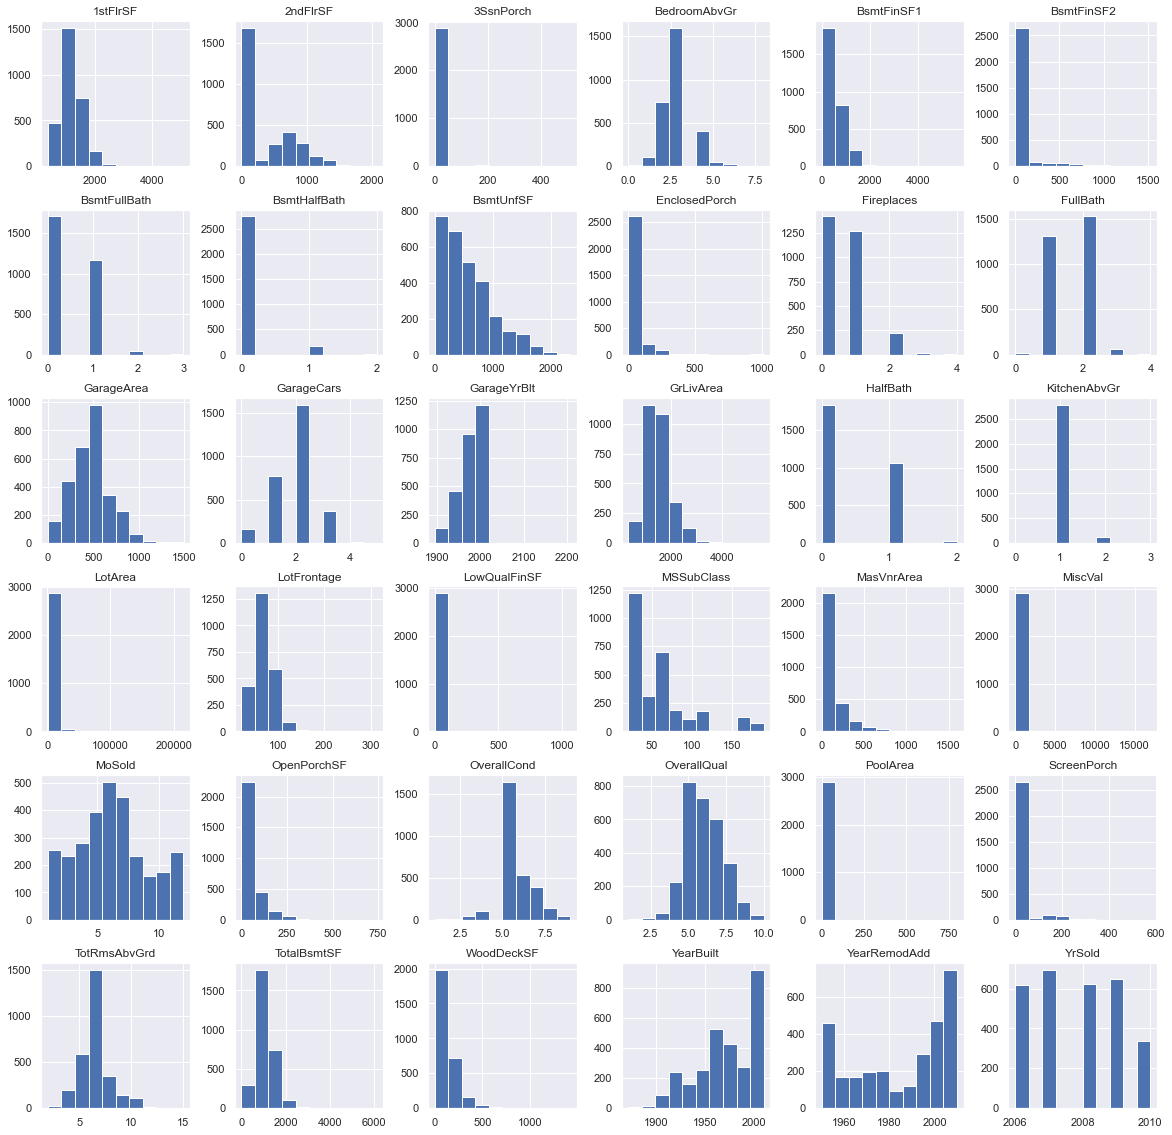

In [69]:
# Numerical Feature Analysis
class Numerical_feature_analysis:
    def __init__(self, dataset, train):
        self.dataset = dataset
        self.train = train
    
    # ------------------------------- FUNCTION 1: DISTRIBUTIONS ---------------------------------------------#
    def distribution_plot(self):
        # Selecting the numeric features
        numeric_feature = self.dataset.select_dtypes(include = [np.number])
        # making  a copy + histplot
        c_data = numeric_feature.copy()
        c_data.hist(figsize = (20,20))
        plt.show()
        
    # -------------------------------- FUNCTION 2: Outliers Analysis ---------------------------------#
    # This code is Not Working, Check if you can rectify the Error or come up with a new function.
    # Function Goal: Give the box plot of all the Numeric features in the dataset having 3 Columns.
    
    """
    def Numeric_Outliers_Analysis(self):
        # Selecting the categorical features
        numeric_features = self.train.select_dtypes(include = [np.number])
        # Looping through all the categorical features
        for feature in numeric_features:
            self.train[feature] = self.train[feature].astype("integer")
            if self.train[feature].isnull().any():
                self.train[feature] = self.train[feature].cat.add_categories(["MISSING"])
                self.train[feature] = self.train[feature].fillna(["MISSING"])
                
        # Function: BOX Plot
        def box_plot(x, y, **kwargs):
            sns.boxplot(x = x, y = y)
            # x->rotation
            x = plt.xticks(rotation = 90)
        
        # Defining the Facedgrid and mapping box_plot 
        f = pd.melt(self.train, id_vars = ["SalePrice"], value_vars = numeric_features)
        g = sns.FacetGrid(f, col = "variable", col_wrap = 3, sharex = False, sharey = False, size = 5)
        g = g.map(box_plot, "value", "SalePrice")

    """
    # -----------------------------------------------------------------------------------------------------#

nfa = Numerical_feature_analysis(dataset, train)
#nfa.Numeric_Outliers_Analysis()
nfa.distribution_plot()

*Note from the Author* -
* I will be keep updating this Data Analysis Notebook as I gain more analytics skills. 
* All These Functions and Classes are working.

*NEXT* -
* Feature Engineering Notebook